# Apresentando Keras

Certifique-se de estar usando tensorflow 1.9 ou mais recente!

Keras é uma API para TensorFlow que facilita muito as coisas. Não é apenas mais fácil de usar, é mais fácil de ajustar.

Vamos configurar a mesma rede neural profunda que configuramos com o TensorFlow para aprender com o conjunto de dados MNIST.

Primeiro nós vamos importar todas as coisas que precisamos, que irá inicializar o Keras:

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/home/leo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Vamos carregar o conjunto de dados MNIST. No Keras, é um pouco diferente - há 60 mil amostras de treinamento e 10 mil amostras de teste. Nenhuma amostra de "validação".

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

Precisamos converter explicitamente os dados no formato esperado pelo Keras / TensorFlow. Nós dividimos os dados da imagem em 255 para normalizá-los em um intervalo de 0-1, após convertê-los em valores de ponto flutuante.

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Agora vamos converter os rótulos 0-9 em um formato "one-hot", como fizemos para o TensorFlow.

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Vamos dar uma olhada em uma das imagens de treinamento só para ter certeza de que está tudo bem:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


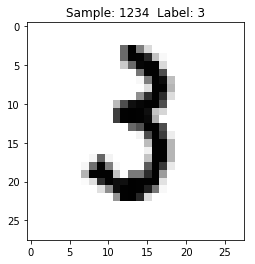

In [5]:
def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Aqui é onde as coisas ficam empolgantes. Todo esse código que escrevemos no Tensorflow criando espaços reservados, variáveis e definindo um monte de álgebra linear para cada camada em nossa rede neural? Nada disso é necessário com Keras!

Podemos configurar as mesmas camadas como esta. A camada de entrada de 784 recursos alimenta uma camada ReLU de 512 nós, que então entra em 10 nós com softmax aplicado. Não poderia ser mais simples:

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Podemos até obter uma boa descrição do modelo resultante:

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Configurar nosso otimizador e função de perda é tão simples. Vamos usar o otimizador RMSProp aqui. Outras opções incluem Adagrad, SGD, Adam, Adamax e Nadam. Veja https://keras.io/optimizers/

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Treinar nosso modelo é também apenas uma linha de código com Keras. Aqui vamos fazer 10 épocas com um tamanho de lote de 100. Keras é mais lento, e se não estivermos correndo em cima de um Tensorflow acelerado por GPU, isso pode levar um bom tempo (é por isso que eu limito isso apenas 10 épocas.)

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2406 - acc: 0.9297 - val_loss: 0.1252 - val_acc: 0.9620
Epoch 2/10
 - 4s - loss: 0.0978 - acc: 0.9712 - val_loss: 0.0846 - val_acc: 0.9740
Epoch 3/10
 - 4s - loss: 0.0646 - acc: 0.9802 - val_loss: 0.0880 - val_acc: 0.9728
Epoch 4/10
 - 4s - loss: 0.0465 - acc: 0.9860 - val_loss: 0.0758 - val_acc: 0.9776
Epoch 5/10
 - 4s - loss: 0.0353 - acc: 0.9891 - val_loss: 0.0805 - val_acc: 0.9758
Epoch 6/10
 - 4s - loss: 0.0274 - acc: 0.9918 - val_loss: 0.0627 - val_acc: 0.9823
Epoch 7/10
 - 4s - loss: 0.0209 - acc: 0.9939 - val_loss: 0.0675 - val_acc: 0.9820
Epoch 8/10
 - 4s - loss: 0.0160 - acc: 0.9953 - val_loss: 0.0761 - val_acc: 0.9818
Epoch 9/10
 - 4s - loss: 0.0131 - acc: 0.9961 - val_loss: 0.0710 - val_acc: 0.9819
Epoch 10/10
 - 5s - loss: 0.0098 - acc: 0.9970 - val_loss: 0.0781 - val_acc: 0.9824


Mas, mesmo com apenas 10 épocas, superamos consideravelmente nossa versão do Tensorflow!

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0780573598645111
Test accuracy: 0.9824


Como antes, vamos visualizar os erros. Como esse modelo é muito melhor, teremos que pesquisar mais profundamente para encontrar erros a serem observados.

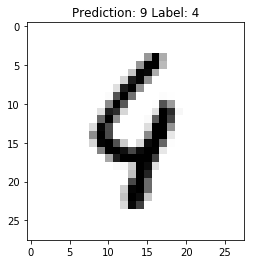

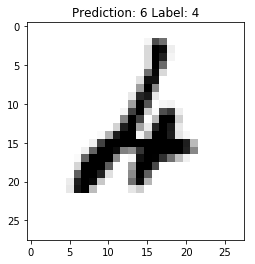

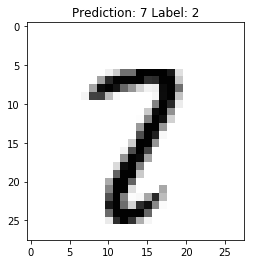

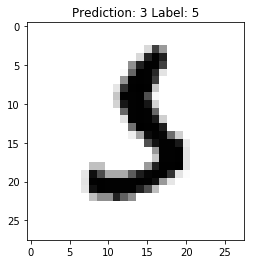

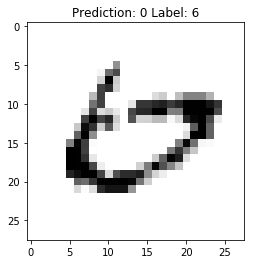

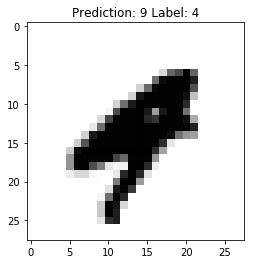

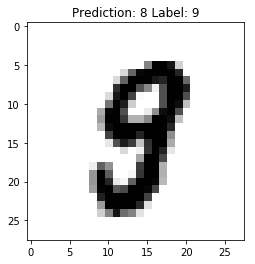

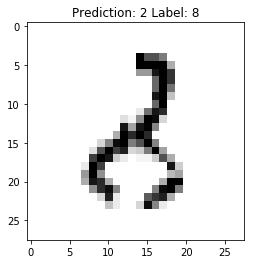

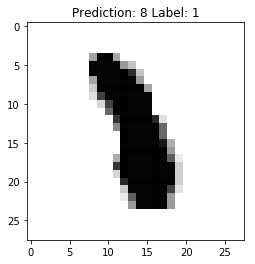

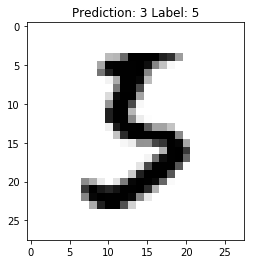

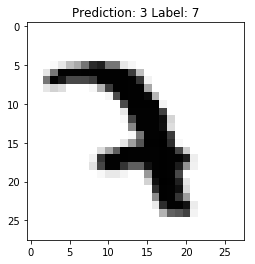

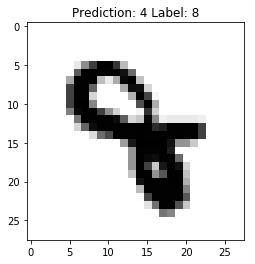

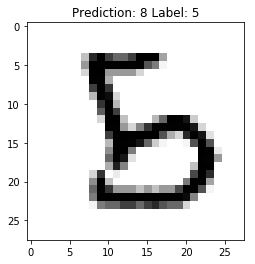

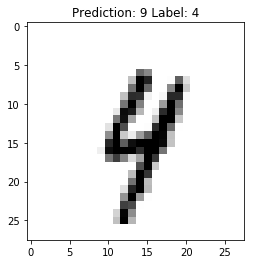

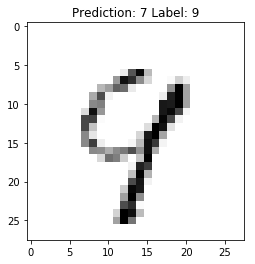

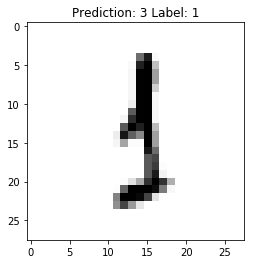

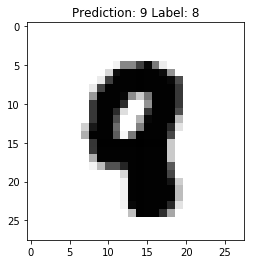

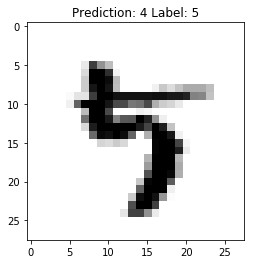

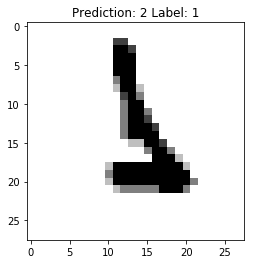

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

Você pode quais imagens são difíceis de ser reconhecidas pelo modelo. Observe que são imagens que humanos também teriam problemas!

## Exercício

Como antes, veja se você pode melhorar os resultados! A execução de mais épocas ajuda consideravelmente? Que tal tentar diferentes otimizadores?

Você também pode aproveitar a facilidade de uso do Keras para experimentar topologias diferentes rapidamente. Keras inclui um exemplo MNIST, onde eles adicionam uma camada adicional, e usam Dropout em cada etapa para evitar overfitting, assim:

`
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
`

Tente adaptar isso ao nosso código acima e veja se ele faz diferença ou não.